## Importing Libraries

In [108]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.image import resize

## Visualizing Single audio

In [2]:
random_file_name="Downloads/Music Genre Classification/Data/genres_original/blues/blues.00001.wav"

In [3]:
y, sr = librosa.load(random_file_name, sr=44100)

In [4]:
y

array([ 0.00340462,  0.00468013,  0.00431603, ..., -0.19014189,
       -0.14924106, -0.06893748], dtype=float32)

In [5]:
sr

44100

In [6]:
y.shape

(1323588,)

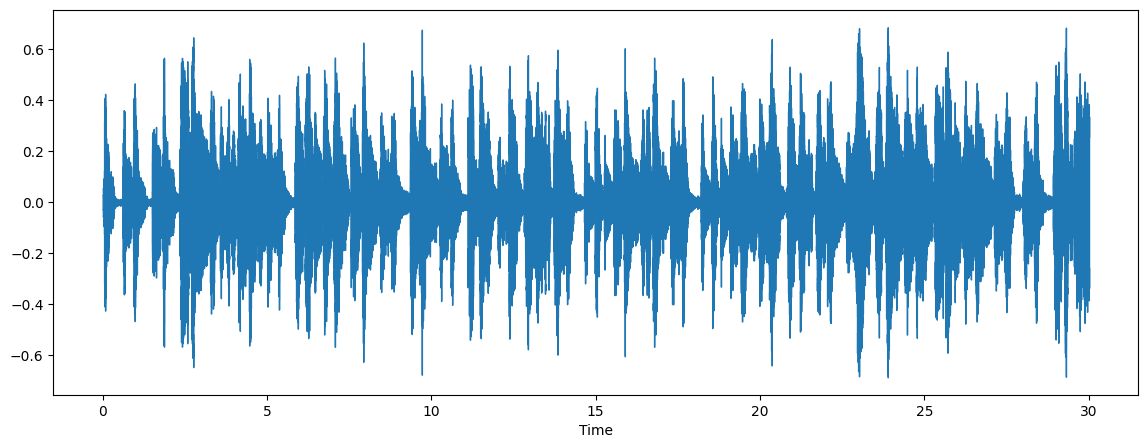

In [7]:
y, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

## Playing Sound

In [8]:
from IPython.display import Audio
Audio(data=y,rate=sr)

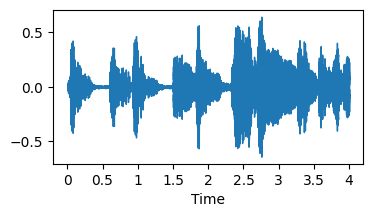

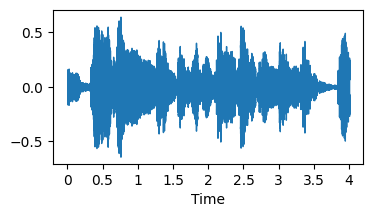

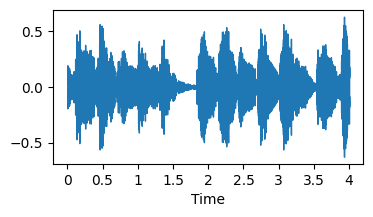

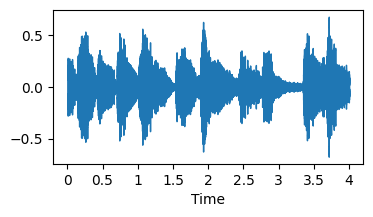

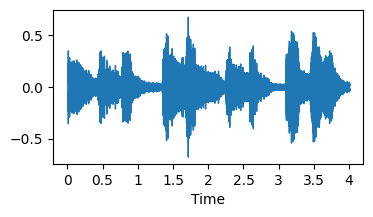

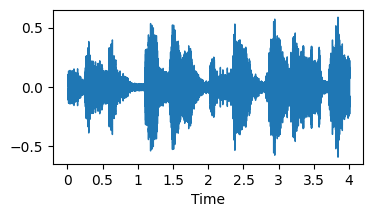

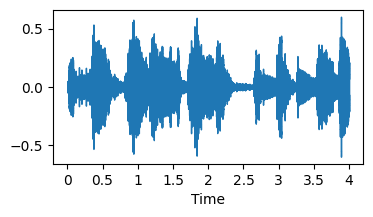

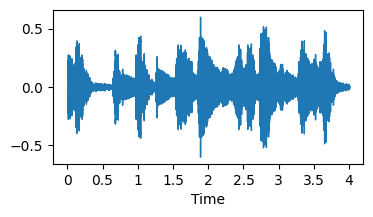

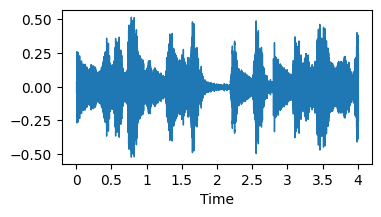

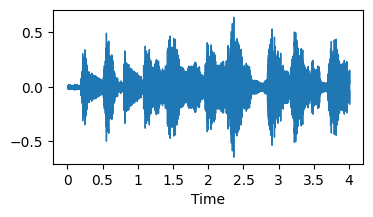

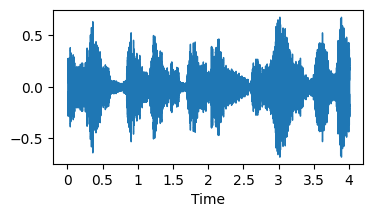

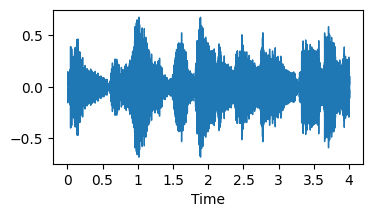

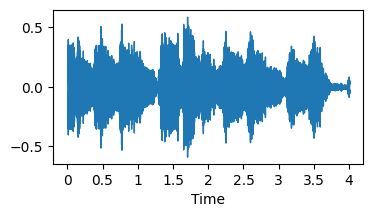

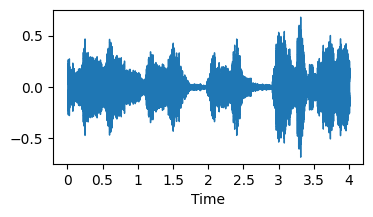

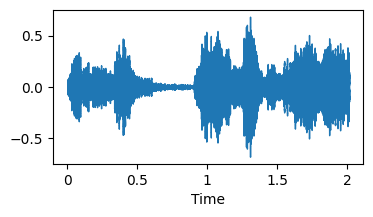

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_path = "Downloads/Music Genre Classification/Data/genres_original/blues/blues.00001.wav" 
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  
overlap_duration = 2  

# Convert duration to samples
chunk_samples = chunk_duration * sr  
overlap_samples = overlap_duration * sr  

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1  

# Iterate over each chunk
for i in range(num_chunks):  
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)  
    end = start + chunk_samples  

    # Extract the chunk audio
    chunky = y[start:end]  # ✅ Correct variable name

    # Plot the chunk
    plt.figure(figsize=(4, 2))  
    librosa.display.waveshow(chunky, sr=sr)  # ✅ Use chunky instead of chunk
    plt.show()

## Melspectogram Visualization

In [10]:
#Plotting Melspectrogram of Entire Audio 
def plot_melespectrogram(y,sr): 
    #Compute spectrogram 
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr) 
    
    #Convert to decibels (log scale) 
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max) 
    
    #Visualize the spectrogram 
    plt.figure(figsize=(10,4)) 
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time',y_axis='mel') 
    plt.colorbar(format='%2.0f dB') 
    plt.title("Spectrogram") 
    plt.tight_layout() 
    plt.show()

In [11]:
random_file_name="Downloads/Music Genre Classification/Data/genres_original/blues/blues.00001.wav"
y,sr = librosa.load(random_file_name, sr=44100)

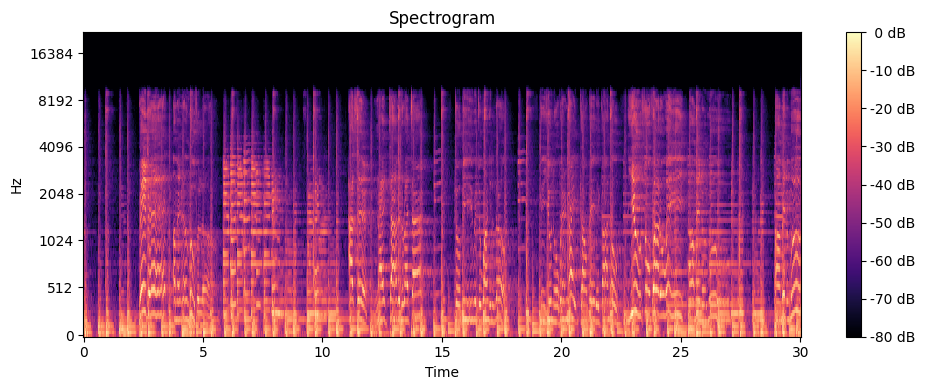

In [12]:
plot_melespectrogram(y,sr)

## Chunks Wise Melspectrogram Visualization

In [13]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  
    overlap_duration = 2  
    
    # Convert duration to samples
    chunk_samples = chunk_duration * sr  
    overlap_samples = overlap_duration * sr  
    
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1  
    
    # Iterate over each chunk
    for i in range(num_chunks):  
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)  
        end = start + chunk_samples  
    
        # Extract the chunk audio
        chunky = y[start:end]  
    
        # Plot the chunk
        plt.figure(figsize=(4, 2))  
        librosa.display.waveshow(chunky, sr=sr)
        plt.show()
        #Melspectrogram part 
        spectrogram = librosa.feature.melspectrogram (y=chunky, sr=sr)
        
        ##[print("Spectrogram Shape:", spectrogram.shape)]
        
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max) 
        #Visualize the spectrogram 
        plt.figure(figsize=(10,4)) 
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time',y_axis='mel') 
        plt.colorbar(format='%2.0f dB') 
        plt.title("Spectrogram") 
        plt.tight_layout() 
        plt.show()

In [14]:
import librosa
random_file_name="Downloads/Music Genre Classification/Data/genres_original/blues/blues.00001.wav"
y,sr = librosa.load(random_file_name, sr=44100)

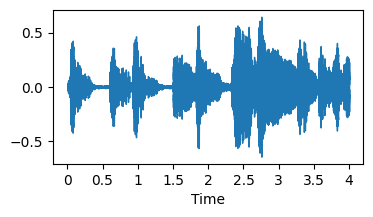

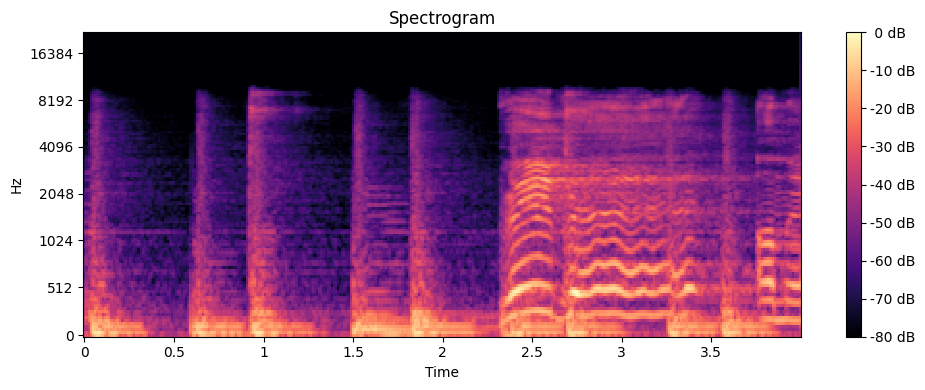

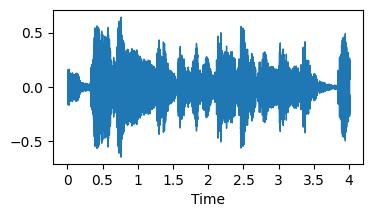

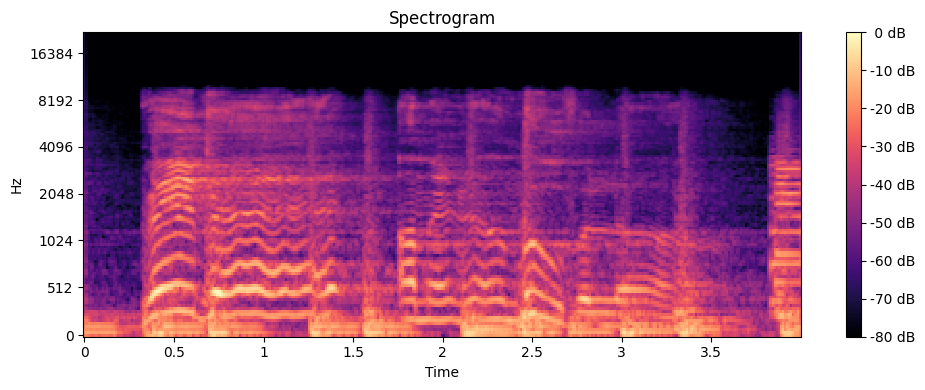

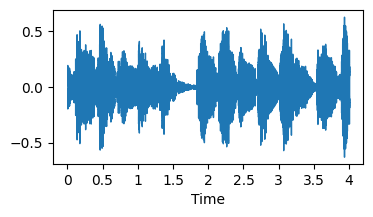

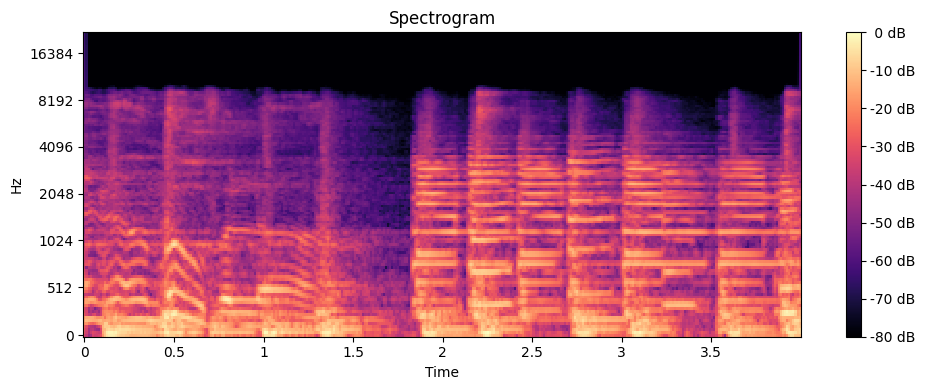

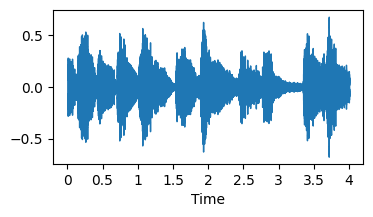

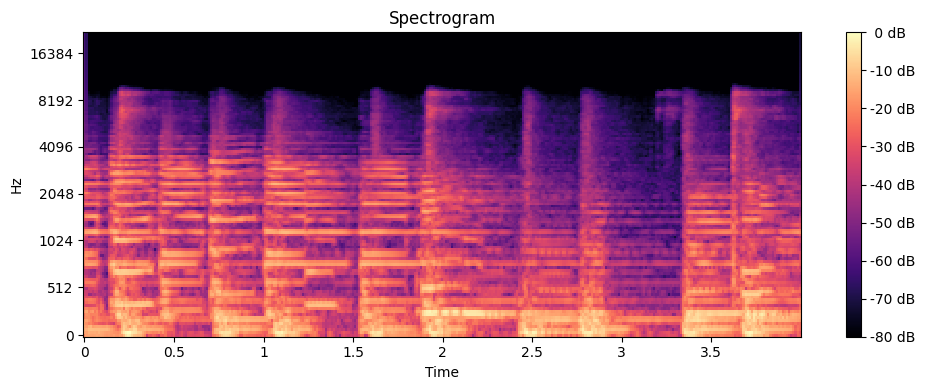

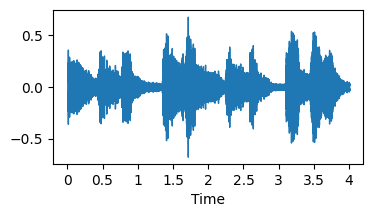

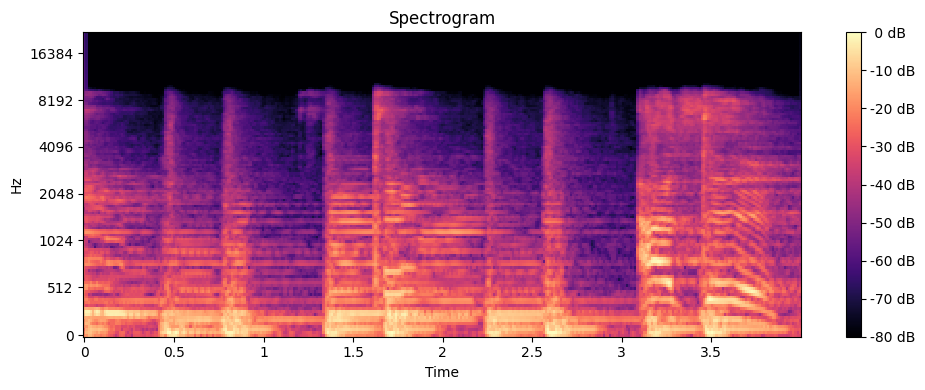

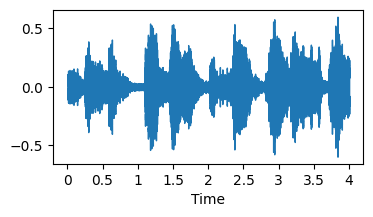

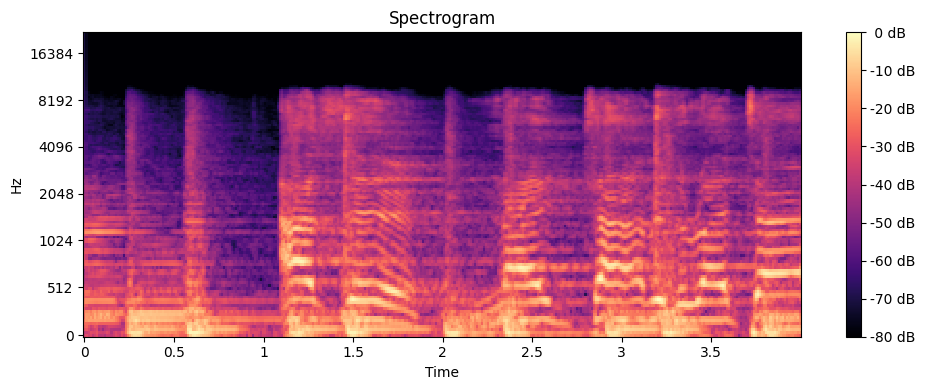

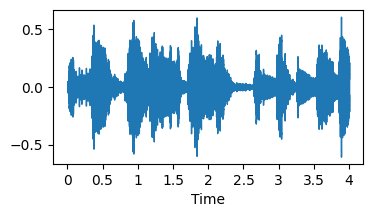

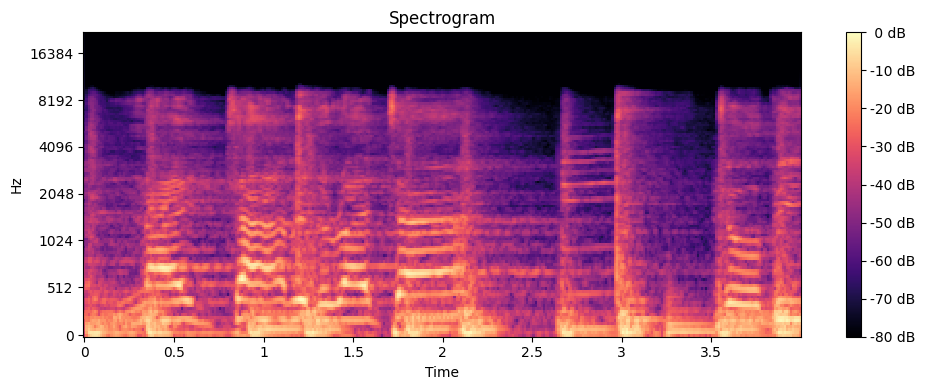

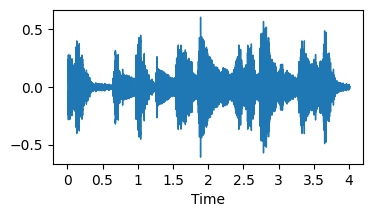

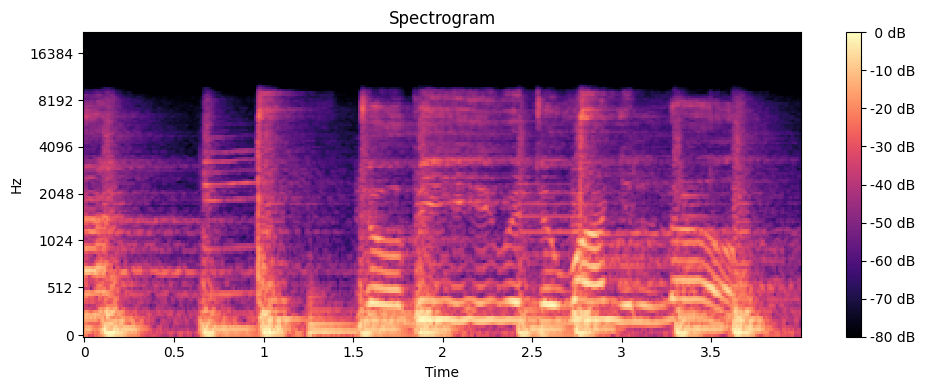

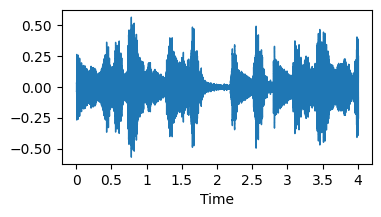

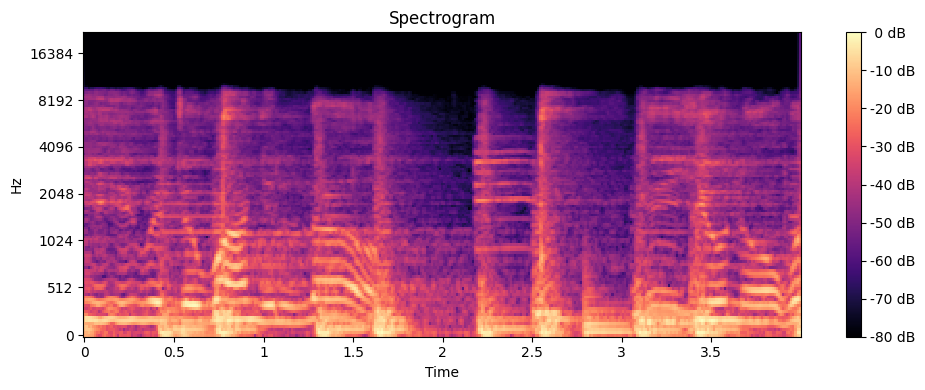

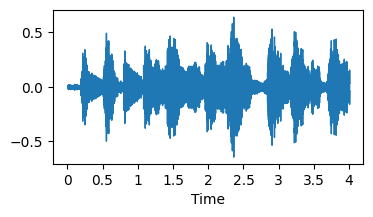

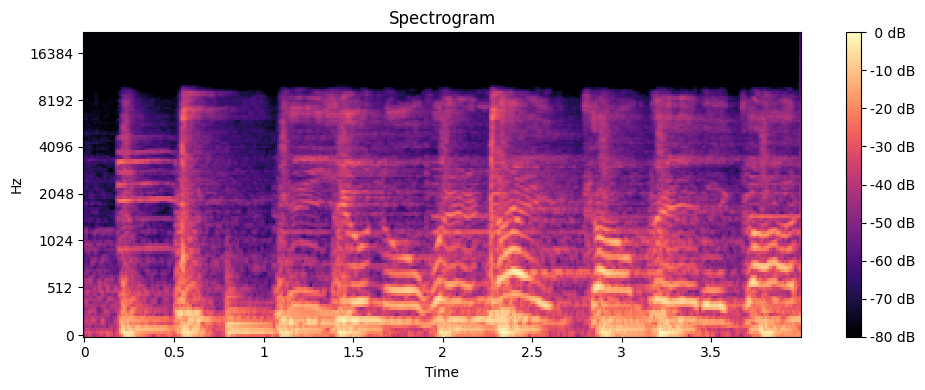

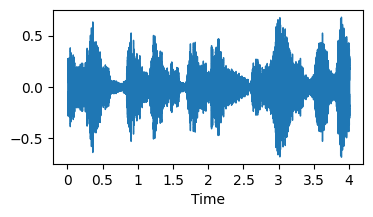

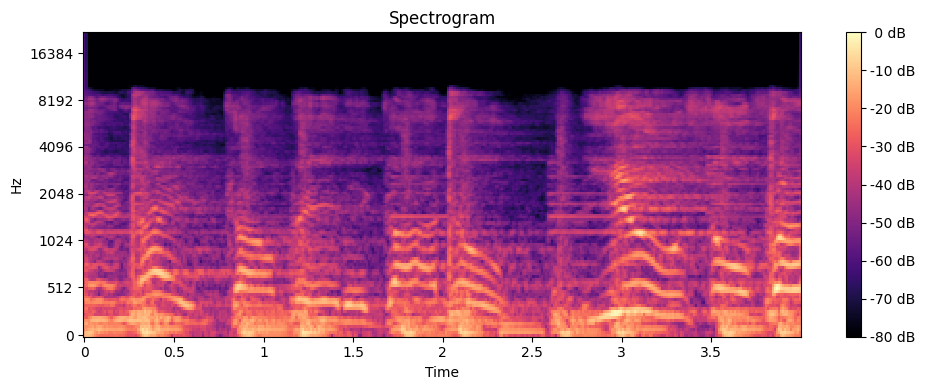

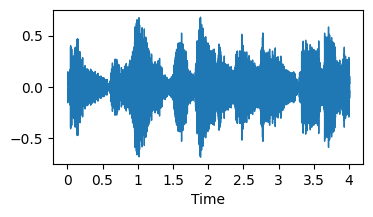

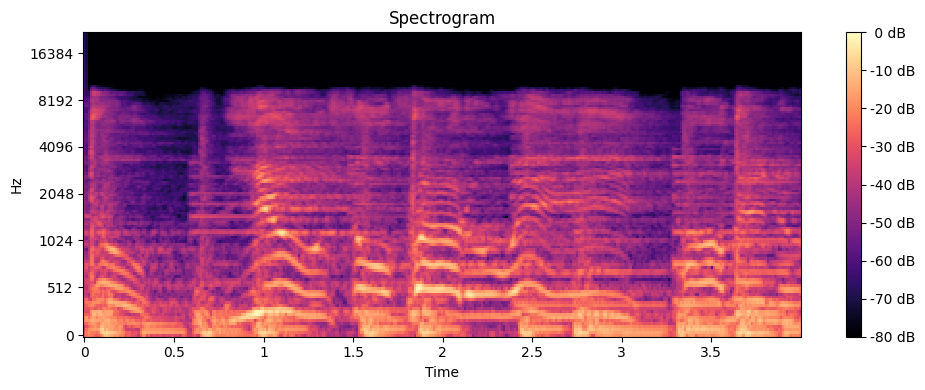

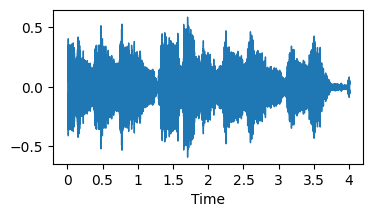

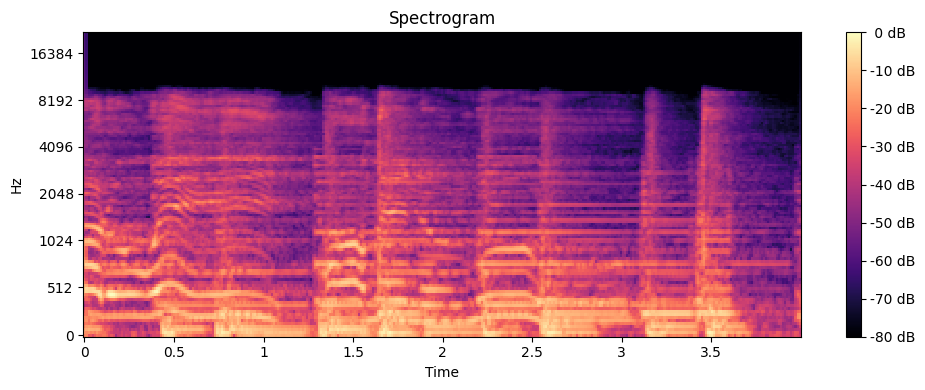

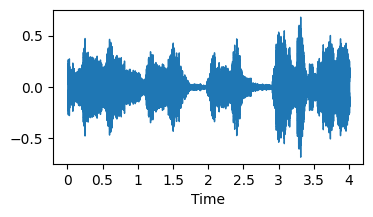

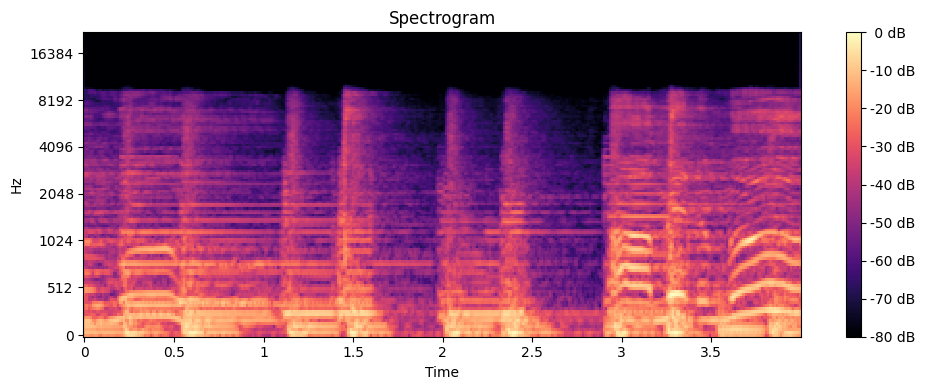

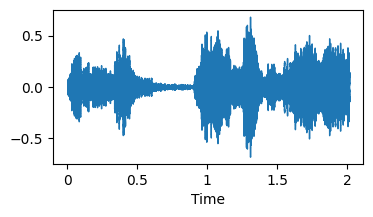

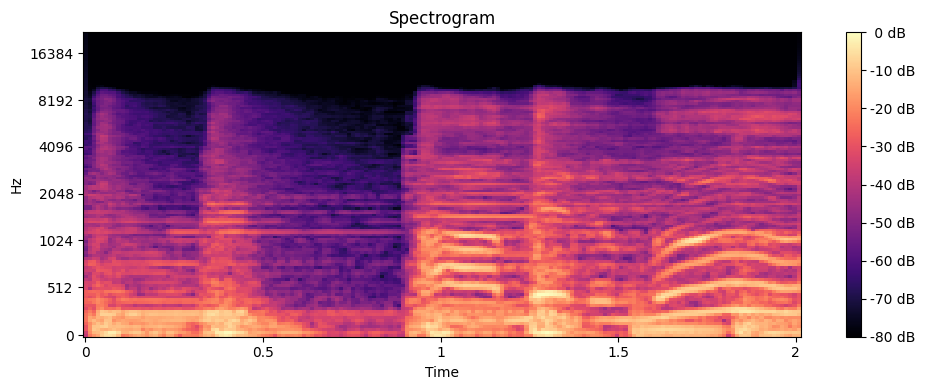

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plot_melspectrogram_chunks(y,sr)

## Data Preprocessing - Final

In [16]:
#define your folder structure 
data_dir = "Downloads/Music Genre Classification/Data/genres_original" 
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--", class_name)  # Fixed dash
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)

                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds

                # Convert duration to sample count
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = min(start + chunk_samples, len(audio_data))  # Fixed out-of-bounds issue

                    # Extract the chunk of audio
                    chunk = audio_data[start:end]

                    # Compute the Mel spectrogram
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)

                    # Resize matrix based on the provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

                    # Append data to lists
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)


In [76]:
data, labels = load_and_preprocess_data(data_dir, classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [77]:
data.shape

(14975, 150, 150, 1)

In [78]:
labels.shape

(14975,)

In [79]:
from tensorflow.keras.utils import to_categorical 
labels = to_categorical(labels, num_classes = len(classes)) # Converting labels to one-hot encoding 
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Doing Visualization on chunks of Audio

In [80]:
labels.shape

(14975, 10)

## SplitTing of Dataset into Training and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [82]:
X_train.shape

(11980, 150, 150, 1)

In [83]:
X_test.shape

(2995, 150, 150, 1)

In [84]:
Y_train.shape

(11980, 10)

In [85]:
Y_test.shape

(2995, 10)

## Building Model

In [ ]:
model = tf.keras.models.Sequential()  # Add this before model.add()

In [106]:
X_train[0].shape

(150, 150, 1)

In [115]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize Model
model = tf.keras.models.Sequential()

# Convolutional Layers
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(150, 150, 1))) 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2), strides=2))  # ✅ Standard pooling

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))  # ✅ Standard pooling
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))  # ✅ Standard pooling

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))  # ✅ Standard pooling
model.add(Dropout(0.3))

# **Global Average Pooling (Replaces Flatten)**
model.add(GlobalAveragePooling2D())  

# **Fully Connected Layers**
model.add(Dense(256, activation='relu'))  # ✅ Reduced from 512 to 256
model.add(Dropout(0.45))  # Regularization
model.add(Dense(10, activation='softmax'))  # Output layer

# Print Model Summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 37, 37, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,476,650 (17.08 MB)

 Trainable params: 4,476,650 (17.08 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
#Compile the model 
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
#Training Model 
training_history= model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1037s 3s/step - accuracy: 0.9502 - loss: 0.1476 - val_accuracy: 0.9362 - val_loss: 0.2310
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1034s 3s/step - accuracy: 0.9567 - loss: 0.1384 - val_accuracy: 0.9312 - val_loss: 0.2303
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1027s 3s/step - accuracy: 0.9672 - loss: 0.1036 - val_accuracy: 0.9306 - val_loss: 0.2488
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1024s 3s/step - accuracy: 0.9725 - loss: 0.0888 - val_accuracy: 0.9295 - val_loss: 0.2854
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1026s 3s/step - accuracy: 0.9691 - loss: 0.0995 - val_accuracy: 0.9386 - val_loss: 0.2343
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 914s 2s/step - accuracy: 0.9690 - loss: 0.0979 - val_accuracy: 0.9292 - val_loss: 0.2772
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 870s 2s/step - accuracy: 0.9654 - loss: 0.1122 - val_accuracy: 0.9416 - val_loss: 0.2202
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 871s 2s/step - accuracy: 0.9775 - loss: 0.0697 - val

In [119]:
model.save("Trained_model.keras")  # Saves in TensorFlow format
model.save("Trained_model.h5")  # Saves in HDF5 format (older but widely used)

In [120]:
import json

# Save training history
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)  # Convert training history to JSON

In [121]:
import json

# Load training history
with open('training_hist.json', 'r') as f:
    loaded_history = json.load(f)

print(loaded_history.keys())  # Should show 'loss', 'accuracy', 'val_loss', 'val_accuracy'

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [122]:
# Reload model
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 37, 37, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,429,952 (51.23 MB)

 Trainable params: 4,476,650 (17.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,953,302 (34.15 MB)

## Model Evaluation - I

In [123]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 209s 554ms/step - accuracy: 0.9952 - loss: 0.0154


In [124]:
train_loss,train_accuracy

(0.013631356880068779, 0.9955759644508362)

In [125]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 539ms/step - accuracy: 0.9566 - loss: 0.1812


In [126]:
training_history_data['val_loss']

[1.708251714706421,
 1.3402396440505981,
 1.0873081684112549,
 0.9003298282623291,
 0.8636239171028137,
 0.636425256729126,
 0.6900743842124939,
 0.6760871410369873,
 0.5397913455963135,
 0.7358826994895935,
 0.5309751033782959,
 0.4382426142692566,
 0.5314857959747314,
 0.4402756989002228,
 0.4111586809158325,
 0.343301385641098,
 0.42800334095954895,
 0.4111294150352478,
 0.40749606490135193,
 0.4133428633213043,
 0.4199633300304413,
 0.46176016330718994,
 0.4554539620876312,
 0.3618141710758209,
 0.39496833086013794,
 0.40918493270874023,
 0.46695876121520996,
 0.40162619948387146,
 0.48460492491722107,
 0.419253945350647]

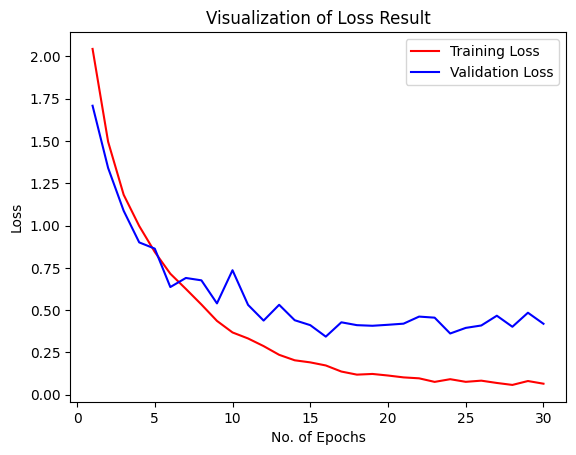

In [127]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

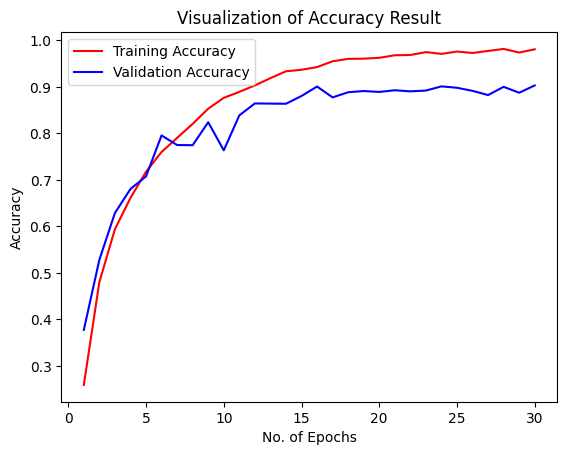

In [128]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Precision,Recall,Confusion Matrix - Model Evaluation-II

In [129]:
X_test.shape

(2995, 150, 150, 1)

In [130]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 525ms/step


array([[6.0694857e-04, 5.8131712e-07, 2.8625524e-04, ..., 9.9699461e-01,
        1.1879210e-04, 2.1590047e-06],
       [1.4887566e-16, 4.4089537e-18, 4.5107912e-17, ..., 9.6213239e-13,
        4.3332101e-15, 1.8984975e-13],
       [2.7344754e-12, 1.1168224e-11, 4.8054782e-10, ..., 7.5061130e-06,
        6.0161304e-10, 6.2746760e-03],
       ...,
       [1.0000000e+00, 1.1194943e-30, 3.3424388e-20, ..., 5.7765955e-23,
        2.8166646e-22, 6.6856372e-19],
       [1.4074486e-06, 9.9985778e-01, 6.8453781e-05, ..., 2.2764086e-06,
        4.3483806e-06, 2.0025647e-05],
       [4.7595054e-07, 6.1044609e-08, 7.6065426e-06, ..., 2.7421750e-03,
        9.6791275e-02, 7.6520060e-05]], dtype=float32)

In [131]:
y_pred.shape

(2995, 10)

In [132]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4])

In [133]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [134]:
Y_test.shape


(2995, 10)

In [135]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [136]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [137]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.94      0.96      0.95       302
   classical       0.92      0.99      0.96       298
     country       0.95      0.85      0.90       317
       disco       0.93      0.98      0.96       312
      hiphop       0.99      0.95      0.97       277
        jazz       0.98      0.96      0.97       311
       metal       0.99      0.98      0.98       302
         pop       0.93      0.89      0.91       289
      reggae       0.95      0.95      0.95       296
        rock       0.87      0.94      0.90       291

    accuracy                           0.94      2995
   macro avg       0.95      0.94      0.94      2995
weighted avg       0.95      0.94      0.94      2995



## Confusion Matrix Visualization

In [138]:
cm

array([[290,   0,   3,   0,   0,   3,   0,   1,   4,   1],
       [  1, 295,   0,   0,   0,   0,   0,   0,   0,   2],
       [ 11,   4, 270,   4,   0,   2,   0,   5,   2,  19],
       [  0,   1,   0, 307,   0,   0,   0,   1,   0,   3],
       [  0,   0,   1,   3, 262,   0,   0,   8,   2,   1],
       [  0,   8,   1,   0,   0, 299,   0,   0,   0,   3],
       [  1,   0,   0,   2,   1,   0, 295,   0,   0,   3],
       [  2,   8,   2,   6,   2,   0,   1, 257,   5,   6],
       [  4,   1,   4,   1,   0,   0,   0,   2, 281,   3],
       [  1,   2,   3,   6,   0,   0,   2,   2,   2, 273]])

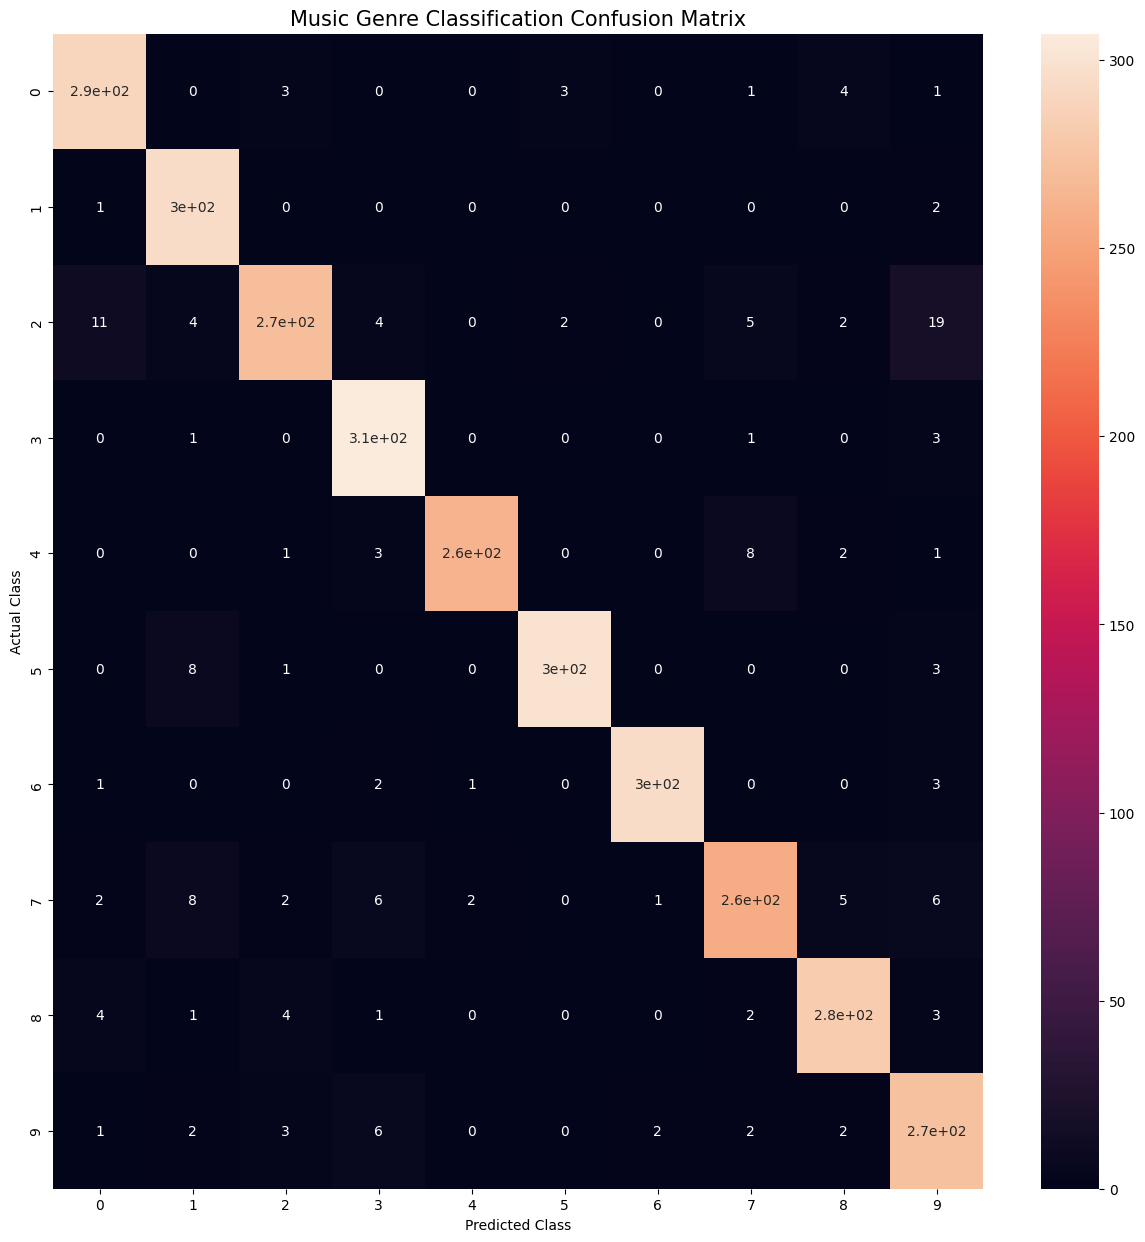

In [139]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()